In [1]:
import torch
import drlqap.nn
import drlqap.qap
import drlqap.simplesolver
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
n = 8
w = 8

In [4]:
with open("../qapdata/testgraph.dat", "r") as f:
    qap = drlqap.qap.GraphAssignmentProblem.from_qaplib_string(f.read())

optimal_value, optimal_assignment = drlqap.simplesolver.solve_qap_backtracking(qap)
optimal_matrix = torch.eye(qap.size)[optimal_assignment]    

input_matrix1 = qap.B
input_matrix2 = qap.linear_costs.T
input_tuple = (input_matrix1.unsqueeze(2), input_matrix2.unsqueeze(2), None, None)

tensor(0.1250)


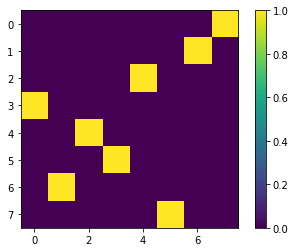

In [5]:
#output_matrix = torch.rand((n, w))
output_matrix = optimal_matrix
print(output_matrix.mean())
plt.imshow(output_matrix)
plt.colorbar()

In [6]:
layers = {
    "QapLayer": drlqap.nn.QapConvLayer(1, w, 3)
}

In [7]:
def train(net, epochs, *inputs, lr=0.01):
    optimizer = torch.optim.Adam(params=net.parameters(), lr=lr)   
    losses = []
    target = output_matrix
    for i in range(epochs):
        optimizer.zero_grad(set_to_none=True)
        net_output = net(*inputs)
        loss = torch.nn.functional.mse_loss(net_output.flatten(), target.flatten())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

In [8]:
losses = {}
for name, layer in layers.items():
    losses[name] = train(layer, 1000, *input_tuple, lr=0.01)
    print(f"{name} finished")

QapLayer finished


QapLayer 0.018801122903823853


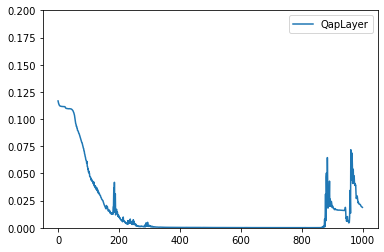

In [9]:
for name, loss in losses.items():
    print(name, loss[-1])
    plt.plot(loss, label=name)
plt.legend()
plt.ylim(top=0.2, bottom=0.0)
plt.show()

QapLayer


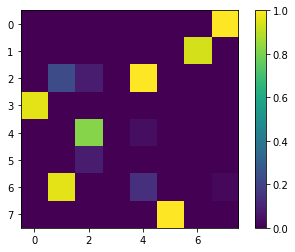

In [10]:
with torch.no_grad():
    for name, layer in layers.items():
        print(name)
        plt.imshow(layer(*input_tuple), vmin=0, vmax=1)
        plt.colorbar()
        plt.show()

Target


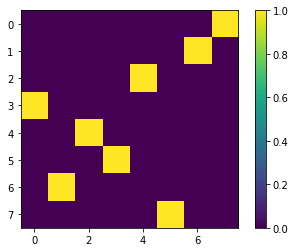

Mean


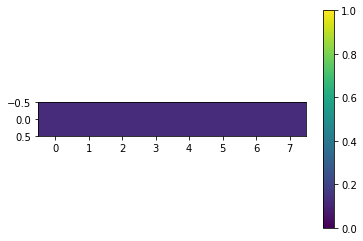

In [11]:
output_mean = torch.mean(output_matrix, dim=0, keepdims=True)
print("Target")
plt.imshow(output_matrix, vmin=0, vmax=1)
plt.colorbar()
plt.show()
print("Mean")
plt.imshow(output_mean, vmin=0, vmax=1)
plt.colorbar()
plt.show()